# CMIP6/CORDEX on CICLAD
Env: `phd_v3`

## Import modules

In [23]:
import xarray as xr # to open and manipulate netcdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/v0.6.4/ version 0.6.4 here)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import intake # to load CMIP6 data (https://intake-esm.readthedocs.io/en/stable/user-guide/cmip6-tutorial.html)

Be aware that intake syntax might be different on CICLAD than from the tutorial

In [24]:
cat = intake.open_catalog('/modfs/catalogs/master.yml')

## Load CMIP6

In [35]:
my_selection = cat.CMIP6.search(
	variable_id = ['tas'],
    table_id = ['Amon'],
	experiment_id = ['historical'], 
    source_id = ['IPSL-CM6A-LR'],
	latest = True
)

my_selection

,unique
path,33
project,1
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,33
table_id,1
variable_id,1
grid_label,1


In [36]:
my_selection.df.head()

,path,project,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,version,init_year,period_start,period_end,climatology,latest
0,/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,CMIP6,CMIP,IPSL,IPSL-CM6A-LR,historical,r26i1p1f1,Amon,tas,gr,v20180803,NaN,1850-01-01T00:00:00,2014-12-01T00:00:00,False,True
1,/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,CMIP6,CMIP,IPSL,IPSL-CM6A-LR,historical,r14i1p1f1,Amon,tas,gr,v20180803,NaN,1850-01-01T00:00:00,2014-12-01T00:00:00,False,True
2,/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,CMIP6,CMIP,IPSL,IPSL-CM6A-LR,historical,r22i1p1f1,Amon,tas,gr,v20180803,NaN,1850-01-01T00:00:00,2014-12-01T00:00:00,False,True
3,/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,CMIP6,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,Amon,tas,gr,v20180803,NaN,1850-01-01T00:00:00,2014-12-01T00:00:00,False,True
4,/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,CMIP6,CMIP,IPSL,IPSL-CM6A-LR,historical,r24i1p1f1,Amon,tas,gr,v20180803,NaN,1850-01-01T00:00:00,2014-12-01T00:00:00,False,True


In [37]:
# Get direct path if you don't want to use intake in the future
my_selection.df.path[0]

'/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r26i1p1f1/Amon/tas/gr/v20180803/tas_Amon_IPSL-CM6A-LR_historical_r26i1p1f1_gr_185001-201412.nc'

In [38]:
# Get data
dset_dict = my_selection.to_dataset_dict(
    zarr_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [39]:
[key for key in dset_dict.keys()]

['CMIP.IPSL.IPSL-CM6A-LR.historical.Amon.gr']

In [41]:
ds = dset_dict["CMIP.IPSL.IPSL-CM6A-LR.historical.Amon.gr"]
ds

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 143, lon: 144, member_id: 33, time: 1980)
Coordinates:
    height       float64 ...
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.73239 -87.46479 ... 88.73239 90.0
  * member_id    (member_id) <U9 'r10i1p1f1' 'r11i1p1f1' ... 'r9i1p1f1'
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1980, 2), meta=np.ndarray>
    tas          (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 143, 144), meta=np.ndarray>
Attributes:
    grid:                    LMDZ grid
    description:             CMIP6 historical
    initialization_index:    1
    variant_info:            Restart from another point in piControl.. Inform...
    activity_id:             CMIP
    physics_index:           1
    parent_experiment_id:    piControl
    tracking_id:             hdl:21.14100/73b9d5f7-02af-424d-b209-bd6e9b470c1...
    creation_date:           2018-06-15T17:54:57Z
    product:                 model-output
    history:                 Mon Sep  3 17:43:49 2018: ncatted -O -a parent_v...
    frequency:               mon
    Conventions:             CF-1.7 CMIP-6.2
    variable_id:             tas
    institution_id:          IPSL
    EXPID:                   historical
    realm:                   atmos
    intake_esm_varname:      tas
    data_specs_version:      01.00.21
    title:                   IPSL-CM6A-LR model output prepared for CMIP6 / C...
    parent_mip_era:          CMIP6
    branch_time_in_parent:   109573.0
    forcing_index:           1
    parent_source_id:        IPSL-CM6A-LR
    grid_label:              gr
    CMIP6_CV_version:        cv=6.2.3.5-2-g63b123e
    table_id:                Amon
    contact:                 ipsl-cmip6@listes.ipsl.fr
    sub_experiment_id:       none
    parent_time_units:       days since 1850-01-01 00:00:00
    experiment:              all-forcing simulation of the recent past
    source:                  IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 14...
    variant_label:           r9i1p1f1
    name:                    /ccc/work/cont003/gencmip6/p86maf/IGCM_OUT/IPSLC...
    branch_time_in_child:    0.0
    external_variables:      areacella
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-C...
    nominal_resolution:      250 km
    experiment_id:           historical
    realization_index:       9
    institution:             Institut Pierre Simon Laplace, Paris 75252, France
    source_id:               IPSL-CM6A-LR
    source_type:             AOGCM BGC
    NCO:                     "4.6.0"
    branch_method:           standard
    license:                 CMIP6 model data produced by IPSL is licensed un...
    mip_era:                 CMIP6
    parent_variant_label:    r1i1p1f1
    parent_activity_id:      CMIP
    sub_experiment:          none
    intake_esm_dataset_key:  CMIP.IPSL.IPSL-CM6A-LR.historical.Amon.gr

In [44]:
ds

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 143, lon: 144, member_id: 33, time: 1980)
Coordinates:
    height       float64 ...
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.73239 -87.46479 ... 88.73239 90.0
  * member_id    (member_id) <U9 'r10i1p1f1' 'r11i1p1f1' ... 'r9i1p1f1'
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1980, 2), meta=np.ndarray>
    tas          (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 143, 144), meta=np.ndarray>
Attributes:
    grid:                    LMDZ grid
    description:             CMIP6 historical
    initialization_index:    1
    variant_info:            Restart from another point in piControl.. Inform...
    activity_id:             CMIP
    physics_index:           1
    parent_experiment_id:    piControl
    tracking_id:             hdl:21.14100/73b9d5f7-02af-424d-b209-bd6e9b470c1...
    creation_date:           2018-06-15T17:54:57Z
    product:                 model-output
    history:                 Mon Sep  3 17:43:49 2018: ncatted -O -a parent_v...
    frequency:               mon
    Conventions:             CF-1.7 CMIP-6.2
    variable_id:             tas
    institution_id:          IPSL
    EXPID:                   historical
    realm:                   atmos
    intake_esm_varname:      tas
    data_specs_version:      01.00.21
    title:                   IPSL-CM6A-LR model output prepared for CMIP6 / C...
    parent_mip_era:          CMIP6
    branch_time_in_parent:   109573.0
    forcing_index:           1
    parent_source_id:        IPSL-CM6A-LR
    grid_label:              gr
    CMIP6_CV_version:        cv=6.2.3.5-2-g63b123e
    table_id:                Amon
    contact:                 ipsl-cmip6@listes.ipsl.fr
    sub_experiment_id:       none
    parent_time_units:       days since 1850-01-01 00:00:00
    experiment:              all-forcing simulation of the recent past
    source:                  IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 14...
    variant_label:           r9i1p1f1
    name:                    /ccc/work/cont003/gencmip6/p86maf/IGCM_OUT/IPSLC...
    branch_time_in_child:    0.0
    external_variables:      areacella
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-C...
    nominal_resolution:      250 km
    experiment_id:           historical
    realization_index:       9
    institution:             Institut Pierre Simon Laplace, Paris 75252, France
    source_id:               IPSL-CM6A-LR
    source_type:             AOGCM BGC
    NCO:                     "4.6.0"
    branch_method:           standard
    license:                 CMIP6 model data produced by IPSL is licensed un...
    mip_era:                 CMIP6
    parent_variant_label:    r1i1p1f1
    parent_activity_id:      CMIP
    sub_experiment:          none
    intake_esm_dataset_key:  CMIP.IPSL.IPSL-CM6A-LR.historical.Amon.gr

In [46]:
ds.tas

<xarray.DataArray 'tas' (member_id: 33, time: 1980, lat: 143, lon: 144)>
dask.array<concatenate, shape=(33, 1980, 143, 144), dtype=float32, chunksize=(1, 1980, 143, 144), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat        (lat) float32 -90.0 -88.73239 -87.46479 ... 88.73239 90.0
  * member_id  (member_id) <U9 'r10i1p1f1' 'r11i1p1f1' ... 'r8i1p1f1' 'r9i1p1f1'
Attributes:
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       air_temperature
    description:         Near-Surface Air Temperature
    long_name:           Near-Surface Air Temperature
    history:             none
    units:               K
    cell_measures:       area: areacella

Be aware to check the size, here 5.38 GB so make sure you have the storage. Here `xarray` does not load any data until you explicitly ask for it. So try to select only what you want before doing complex operations. See example below:

In [62]:
da = ds.tas.sel(lat=slice(30,80), member_id='r1i1p1f1').mean('time')
da

<xarray.DataArray 'tas' (lat: 40, lon: 144)>
dask.array<mean_agg-aggregate, shape=(40, 144), dtype=float32, chunksize=(40, 144), chunktype=numpy.ndarray>
Coordinates:
    height     float64 2.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat        (lat) float32 30.422535 31.690142 32.957745 ... 78.59155 79.85915
    member_id  <U9 'r1i1p1f1'

In [63]:
da.load()

<xarray.DataArray 'tas' (lat: 40, lon: 144)>
array([[291.27438, 291.6098 , 292.76184, ..., 286.91684, 290.94376,
        291.71957],
       [290.18124, 290.53064, 292.33432, ..., 286.6437 , 284.48178,
        289.0226 ],
       [287.31656, 289.18793, 291.46155, ..., 289.41235, 283.96933,
        285.6027 ],
       ...,
       [266.28778, 267.98724, 269.48987, ..., 262.57248, 263.61667,
        264.82275],
       [263.042  , 264.16476, 265.53052, ..., 260.95712, 261.5778 ,
        262.25385],
       [261.20505, 261.7277 , 262.3441 , ..., 259.89938, 260.2664 ,
        260.74072]], dtype=float32)
Coordinates:
    height     float64 2.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat        (lat) float32 30.422535 31.690142 32.957745 ... 78.59155 79.85915
    member_id  <U9 'r1i1p1f1'

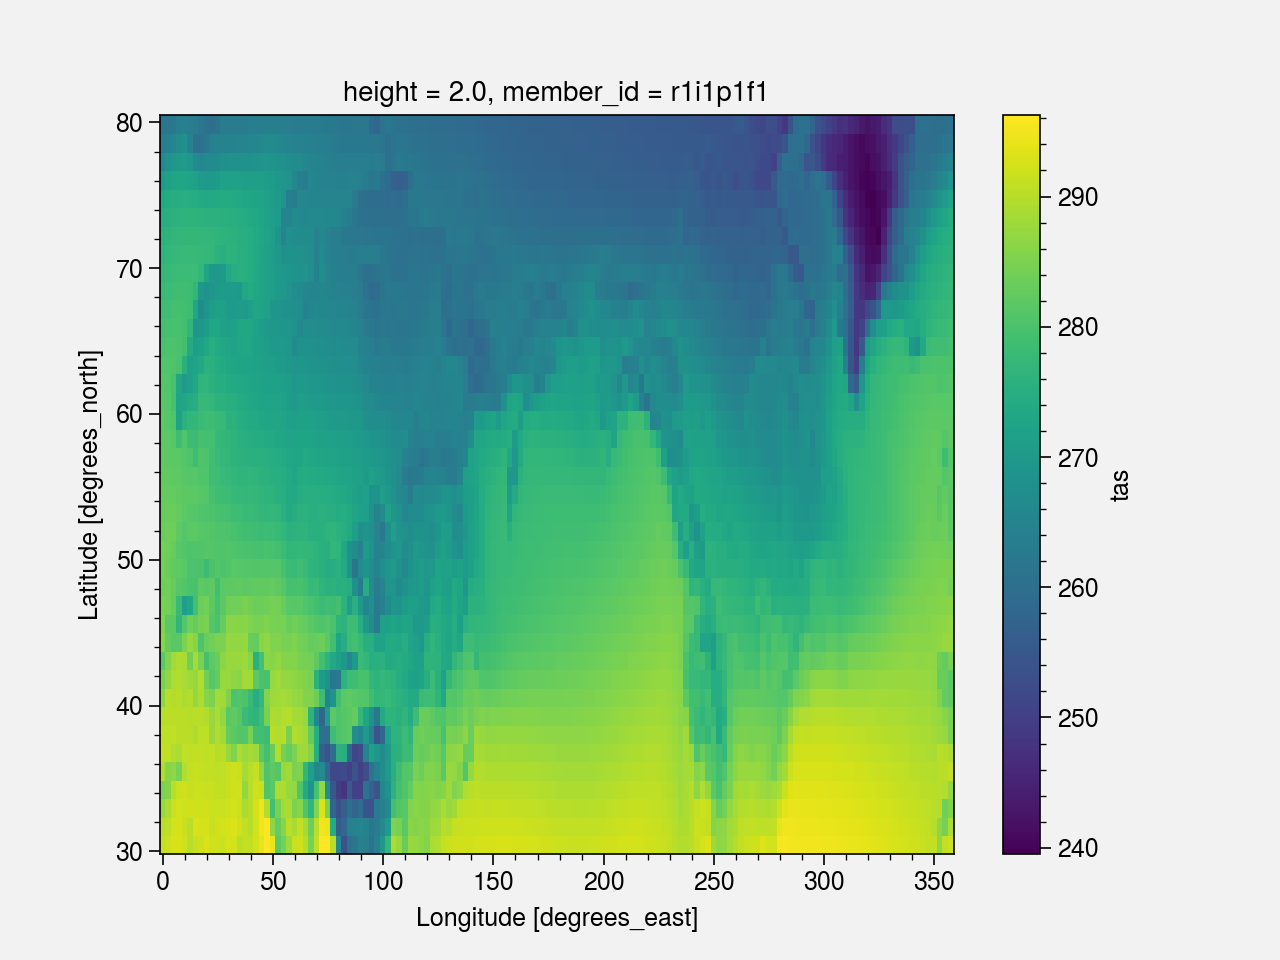

In [64]:
da.plot()

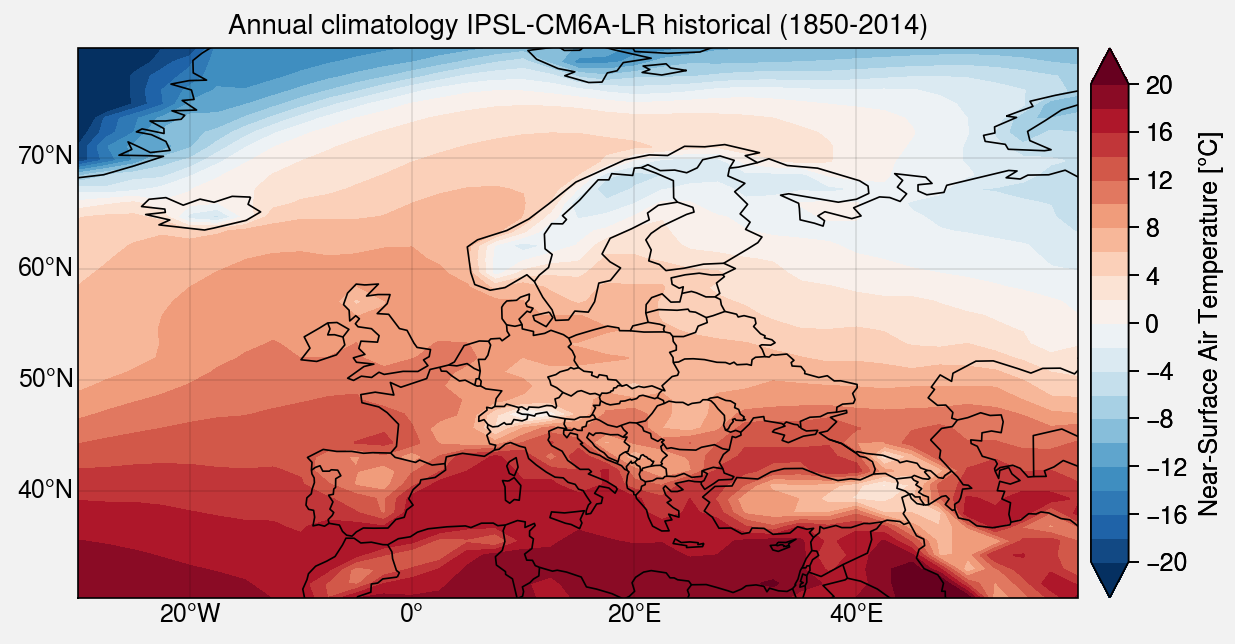

In [76]:
fig, axs = plot.subplots(proj='cyl', axwidth=5)

m = axs[0].contourf(da-273.15, cmap='BuRd', globe=True, levels=plot.arange(-20, 20, 2), extend='both')
axs[0].colorbar(m, label='Near-Surface Air Temperature [°C]')

axs.format(
    borders=True, labels=True, coast=True,
    lonlim=(-30, 60),
    latlim=(da.lat.min(), da.lat.max()),
    title='Annual climatology IPSL-CM6A-LR historical (1850-2014)'
)

## Load CORDEX

In [77]:
my_selection = cat.CORDEX.search(
	variable = ['pr'],
    time_frequency = ['day'],
	experiment = ['historical'], 
    rcm_model = ['CNRM-ALADIN63'],
    driving_model = ['CNRM-CERFACS-CNRM-CM5'],
	latest = True)

my_selection

,unique
path,11
project,1
product,1
domain,1
institute,1
driving_model,1
experiment,1
ensemble,1
rcm_model,1
rcm_version,1


In [78]:
dset_dict = my_selection.to_dataset_dict(
    zarr_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'domain.institute.driving_model.experiment.rcm_model.time_frequency'


In [79]:
[key for key in dset_dict.keys()]

['EUR-11.CNRM.CNRM-CERFACS-CNRM-CM5.historical.CNRM-ALADIN63.day']

In [80]:
dset_dict["EUR-11.CNRM.CNRM-CERFACS-CNRM-CM5.historical.CNRM-ALADIN63.day"]

<xarray.Dataset>
Dimensions:            (axis_nbounds: 2, ensemble: 1, nvertex: 4, time: 20089, x: 453, y: 453)
Coordinates:
    lat                (y, x) float64 dask.array<chunksize=(453, 453), meta=np.ndarray>
    lon                (y, x) float64 dask.array<chunksize=(453, 453), meta=np.ndarray>
  * y                  (y) float64 0.0 12.5 25.0 ... 5.638e+03 5.65e+03
  * time               (time) datetime64[ns] 1976-01-01T12:00:00 ... 1995-12-...
  * x                  (x) float64 0.0 12.5 25.0 ... 5.638e+03 5.65e+03
  * ensemble           (ensemble) <U6 'r1i1p1'
Dimensions without coordinates: axis_nbounds, nvertex
Data variables:
    bounds_lon         (time, y, x, nvertex) float64 dask.array<chunksize=(1827, 453, 453, 4), meta=np.ndarray>
    Lambert_Conformal  (time) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    time_bounds        (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1827, 2), meta=np.ndarray>
    bounds_lat         (time, y, x, nvertex) float64 dask.array<chunksize=(1827, 453, 453, 4), meta=np.ndarray>
    pr                 (ensemble, time, y, x) float32 dask.array<chunksize=(1, 1827, 453, 453), meta=np.ndarray>
Attributes:
    description:                    Created by xios
    project_id:                     CORDEX
    model_id:                       CNRM-ALADIN63
    rcm_version_id:                 v2
    driving_model_id:               CNRM-CERFACS-CNRM-CM5
    contact:                        contact.aladin-cordex@meteo.fr
    c3s_disclaimer:                 This data has been produced in the contex...
    tracking_id:                    hdl:21.14103/5874f3b6-3ecc-4091-a522-88cd...
    creation_date:                  2018-11-09T06:33:12Z
    product:                        output
    driving_experiment_name:        historical
    institute_id:                   CNRM
    frequency:                      day
    Conventions:                    CF-1.6
    experiment:                     Historical run with GCM forcing
    CORDEX_domain:                  EUR-11
    Convention:                     CF-1.6
    name:                           EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r...
    comment:                        CORDEX Europe EUR-11 CNRM-ALADIN 6.3 L91 ...
    driving_experiment_comment:     Known issue correction: this simulation (...
    experiment_id:                  historical
    intake_esm_varname:             pr
    institution:                    CNRM (Centre National de Recherches Meteo...
    driving_experiment:             CNRM-CERFACS-CNRM-CM5, historical, r1i1p1
    title:                          Created by xios
    references:                     http://www.umr-cnrm.fr/spip.php?article12...
    driving_model_ensemble_member:  r1i1p1
    intake_esm_dataset_key:         EUR-11.CNRM.CNRM-CERFACS-CNRM-CM5.histori...

# /!\ time dimension not good /!\
-> load by hand with xarray open_mfdataset

In [81]:
my_selection.df['path'][0]

'/bdd/CORDEX/output/EUR-11/CNRM/CNRM-CERFACS-CNRM-CM5/historical/r1i1p1/CNRM-ALADIN63/v2/day/pr/v20190510/pr_EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CNRM-ALADIN63_v2_day_19760101-19801231.nc'

In [82]:
path = '/bdd/CORDEX/output/EUR-11/CNRM/CNRM-CERFACS-CNRM-CM5/historical/r1i1p1/CNRM-ALADIN63/v2/day/pr/v20190510/'

ds = xr.open_mfdataset(
    path+'pr_EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CNRM-ALADIN63_v2_day_*.nc',
    combine='by_coords',
)

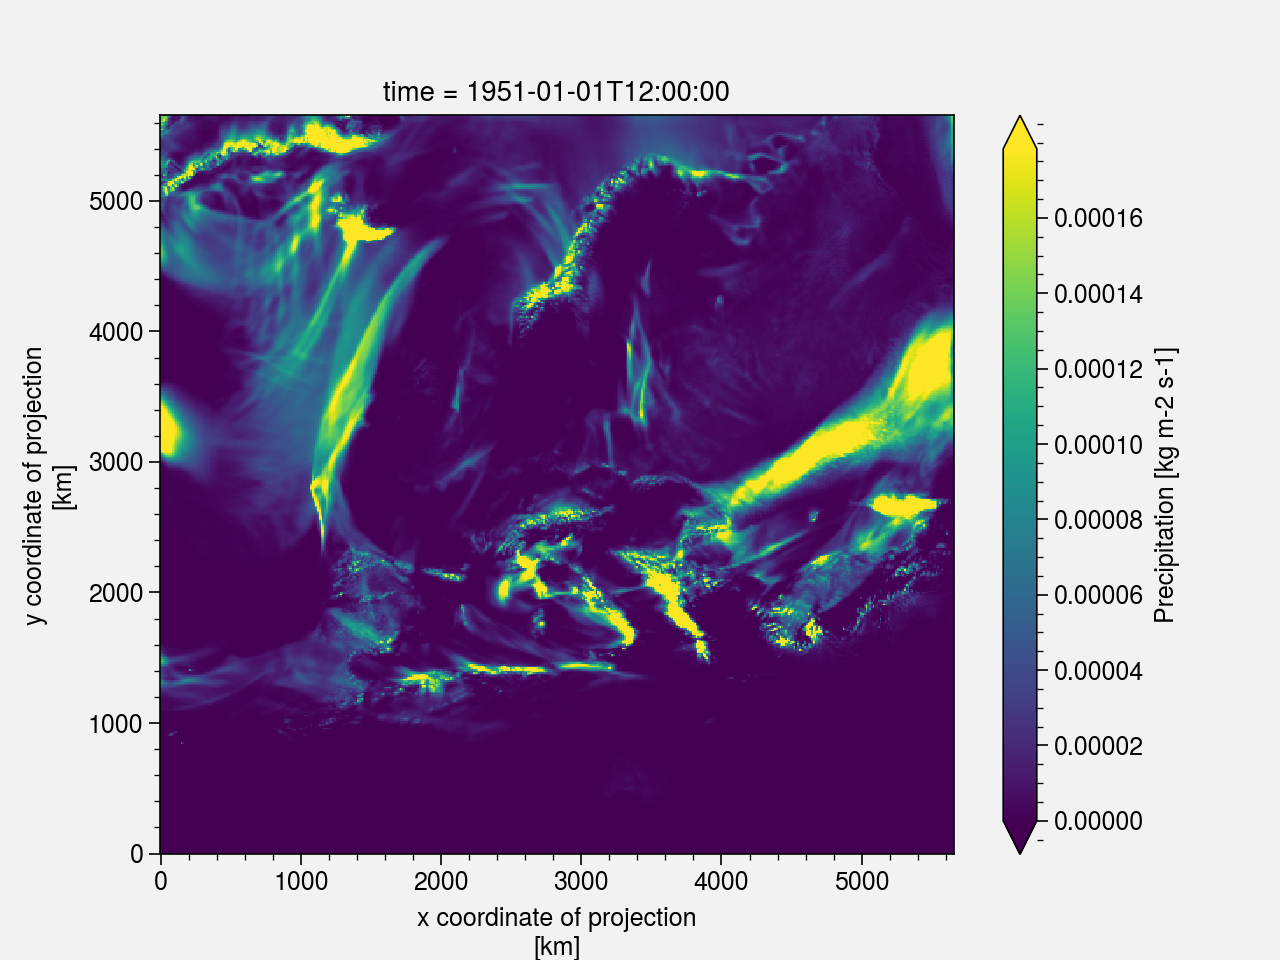

In [83]:
ds.pr[0].plot(robust=True)

## Regrid towards lat/lon grid using xESMF
https://xesmf.readthedocs.io/en/latest/ (or you can use CDO or any other method)

In [97]:
ds.lat.min().values, ds.lat.max().values, ds.lon.min().values, ds.lon.max().values,

(array(20.98008124),
 array(73.96581452),
 array(-51.56399489),
 array(72.56399489))

In [100]:
grid = xr.Dataset(
     coords={
         "lon": plot.arange(-52, 73, 0.1),
         "lat": plot.arange(20, 74, 0.1),
     },
 )

grid

<xarray.Dataset>
Dimensions:  (lat: 541, lon: 1251)
Coordinates:
  * lon      (lon) float64 -52.0 -51.9 -51.8 -51.7 -51.6 ... 72.7 72.8 72.9 73.0
  * lat      (lat) float64 20.0 20.1 20.2 20.3 20.4 ... 73.6 73.7 73.8 73.9 74.0
Data variables:
    *empty*

## Regrid avec xESFM
https://xesmf.readthedocs.io/en/latest/

In [101]:
# Because obs are not global (https://github.com/JiaweiZhuang/xESMF/issues/15)
import scipy
def add_matrix_NaNs(regridder):
        X = regridder.weights
        M = scipy.sparse.csr_matrix(X)
        num_nonzeros = np.diff(M.indptr)
        M[num_nonzeros == 0, 0] = np.NaN
        regridder.weights = scipy.sparse.coo_matrix(M)
        return regridder

regridder = xe.Regridder(ds.pr[0], grid, "bilinear", reuse_weights=True)
regridder = add_matrix_NaNs(regridder)

Create weight file: bilinear_453x453_541x1251.nc


/data/mlalande/miniconda3/envs/phd_v3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [102]:
# Then you can make regrid on all data set but might be a bit long
# da_regrid = regridder(ds.pr)

da_regrid = regridder(ds.pr[0])

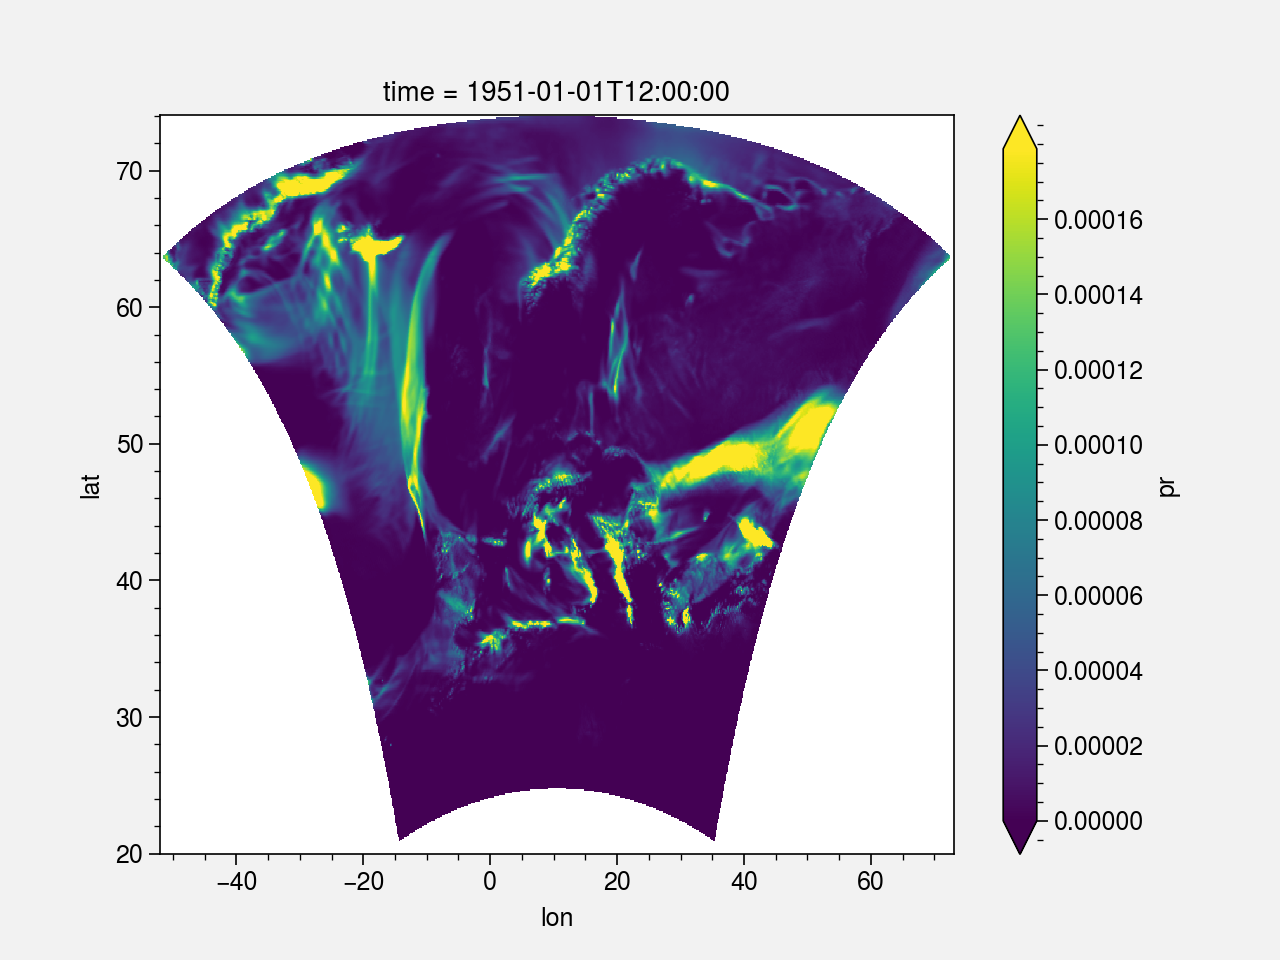

In [109]:
da_regrid.plot(robust=True)

In [115]:
ds.pr.units

'kg m-2 s-1'

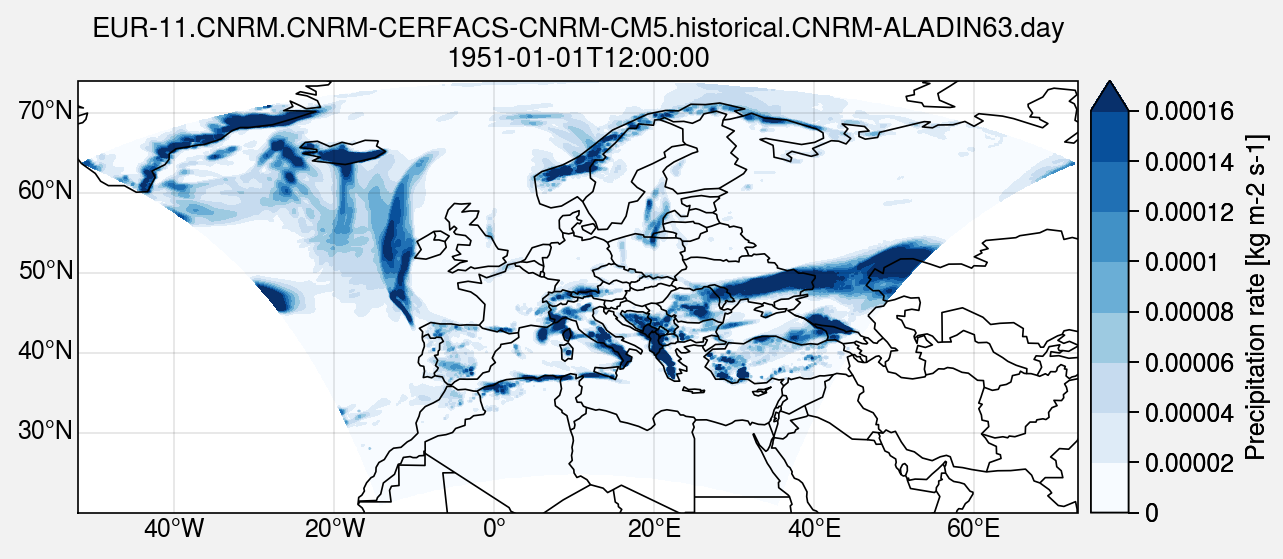

In [120]:
fig, axs = plot.subplots(proj='cyl', axwidth=5)

m = axs[0].contourf(da_regrid, cmap='Blues', levels=plot.arange(0, 16e-5, 2e-5), extend='max')
axs[0].colorbar(m, label='Precipitation rate [kg m-2 s-1]')

axs.format(
    borders=True, labels=True, coast=True,
    lonlim=(da_regrid.lon.min(), da_regrid.lon.max()),
    latlim=(da_regrid.lat.min(), da_regrid.lat.max()),
    title='EUR-11.CNRM.CNRM-CERFACS-CNRM-CM5.historical.CNRM-ALADIN63.day\n1951-01-01T12:00:00'
)